In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pykrx import stock


In [17]:
# 분석 기간 설정
start_date = "20221017"
end_date = "20241227"

# 자산 A: KODEX 레버리지 (코스피200 레버리지 ETF)
kospiX2 = stock.get_market_ohlcv_by_date(start_date, end_date, "122630")

# 자산 B: KODEX 코스닥150 선물인버스 (코스닥150 선물 인버스 ETF)
kosdaqInverseX2 = stock.get_market_ohlcv_by_date(start_date, end_date, "251340")

# 종가 데이터만 사용
kospiX2 = kospiX2[['종가']]
kosdaqInverseX2 = kosdaqInverseX2[['종가']]

# 칼럼 이름 변경
kospiX2.rename(columns={'종가': 'Price_A'}, inplace=True)
kosdaqInverseX2.rename(columns={'종가': 'Price_B'}, inplace=True)

# 데이터 프레임 병합
data = kospiX2.join(kosdaqInverseX2, how='inner')

# 결측치 제거
data.dropna(inplace=True)

# 데이터 확인
data.head()


,Price_A,Price_B
날짜,,
2022-10-17,12475,5600
2022-10-18,12805,5450
2022-10-19,12595,5545
2022-10-20,12335,5670
2022-10-21,12385,5680


In [18]:
# 자산 A의 일일 수익률
data['Return_A'] = data['Price_A'].pct_change()

# 자산 B의 일일 수익률
data['Return_B'] = data['Price_B'].pct_change()

# 결측치 제거
data.dropna(inplace=True)

# 일일 수익률 확인
data[['Return_A', 'Return_B']].head()


,Return_A,Return_B
날짜,,
2022-10-18,0.026453,-0.026786
2022-10-19,-0.016400,0.017431
2022-10-20,-0.020643,0.022543
2022-10-21,0.004054,0.001764
2022-10-24,0.019378,-0.033451


In [19]:
# 매일 동일 비중 리밸런싱 포트폴리오 수익률 계산
data['Portfolio_Return'] = (data['Return_A'] * 0.5) + (data['Return_B'] * (0.5))


In [23]:
# 포트폴리오의 누적 수익률
data['Cumulative_Return'] = (1 + data['Portfolio_Return']).cumprod()
data


,Price_A,Price_B,Return_A,Return_B,Portfolio_Return,Cumulative_Return,Cumulative_Return_A,Cumulative_Return_B
날짜,,,,,,,,
2022-10-18,12805,5450,0.026453,-0.026786,-0.000166,0.999834,1.026453,0.973214
2022-10-19,12595,5545,-0.016400,0.017431,0.000516,1.000349,1.009619,0.990179
2022-10-20,12335,5670,-0.020643,0.022543,0.000950,1.001299,0.988778,1.012500
2022-10-21,12385,5680,0.004054,0.001764,0.002909,1.004212,0.992786,1.014286
2022-10-24,12625,5490,0.019378,-0.033451,-0.007036,0.997146,1.012024,0.980357
...,...,...,...,...,...,...,...,...
2024-12-20,13775,4280,-0.028904,0.023923,-0.002490,1.017635,1.104208,0.764286
2024-12-23,14230,4215,0.033031,-0.015187,0.008922,1.026714,1.140681,0.752679
2024-12-24,14230,4185,0.000000,-0.007117,-0.003559,1.023060,1.140681,0.747321


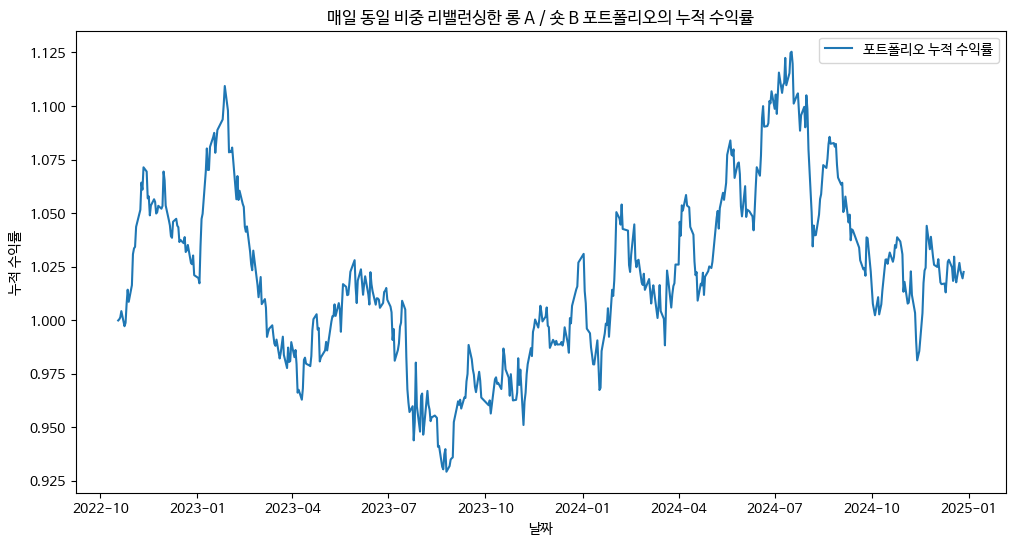

In [21]:
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Cumulative_Return'], label='포트폴리오 누적 수익률')
plt.title('매일 동일 비중 리밸런싱한 롱 A / 숏 B 포트폴리오의 누적 수익률')
plt.xlabel('날짜')
plt.ylabel('누적 수익률')
plt.legend()
plt.show()


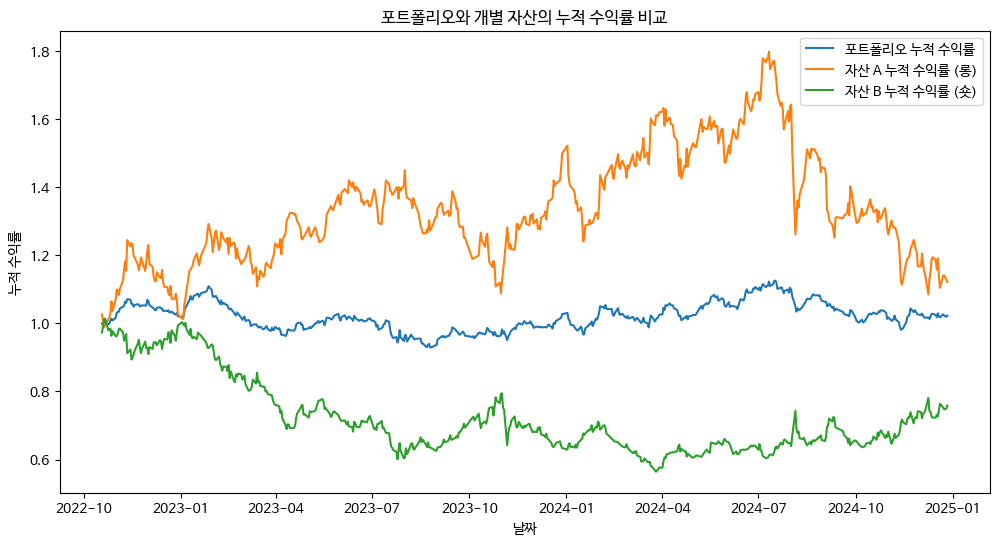

In [22]:
# 자산 A와 B의 누적 수익률 계산
data['Cumulative_Return_A'] = (1 + data['Return_A']).cumprod()
data['Cumulative_Return_B'] = (1 + data['Return_B']).cumprod()

# # 자산 B는 숏 포지션이므로, 수익률을 반대로 계산
# data['Cumulative_Return_B_Short'] = (1 - data['Return_B']).cumprod()

# 시각화
plt.figure(figsize=(12,6))
plt.plot(data.index, data['Cumulative_Return'], label='포트폴리오 누적 수익률')
plt.plot(data.index, data['Cumulative_Return_A'], label='자산 A 누적 수익률 (롱)')
plt.plot(data.index, data['Cumulative_Return_B'], label='자산 B 누적 수익률 (숏)')
plt.title('포트폴리오와 개별 자산의 누적 수익률 비교')
plt.xlabel('날짜')
plt.ylabel('누적 수익률')
plt.legend()
plt.show()
